# Notebook: Analyzing Labeled Anomaly Data

**Location:** `notebooks/Analytics.ipynb`  
**Purpose:** Load `data/results/new_data_labeled.csv` (output of our anomaly‐detection pipeline) and perform exploratory and summary analyses to understand the behavior of your sensors and anomalies.  


In [1]:
# Cell 1: Imports and path definitions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configure matplotlib for inline display
%matplotlib inline

# Define paths (assuming this notebook is in notebooks/ folder)
notebook_dir = Path().resolve().parent / "notebooks"
# Path to the labeled CSV:
labeled_csv = Path().resolve().parent / "data" / "results" / "new_data_labeled.csv"

# Check that file exists
assert labeled_csv.exists(), f"File not found: {labeled_csv}"
print(f"Loading data from: {labeled_csv}")

Loading data from: C:\Users\tyler\Desktop\Pet_Health\data\results\new_data_labeled.csv


In [2]:
# Cell 2: Load data into a pandas DataFrame
df = pd.read_csv(labeled_csv, parse_dates=["timestamp"])

# Display first few rows
display(df.head(10))

# Show DataFrame info (dtypes, non-null counts)
df.info()


,timestamp,temp_C,humidity_%,accel_x,accel_y,accel_z,accel_mag,anomaly,time_str,anomaly_score,raw_anomaly,label_overall,z_temp_C,z_humidity_%,z_accel_x,z_accel_y,z_accel_z,contributing_features
0,2025-06-04 20:11:07.891226-04:00,21.04,68.02,0.079712,-0.122803,0.997192,1.007883,0,08:11:07 PM,0.099089,1,normal,-0.164669,-1.598030,-0.321380,-0.589894,0.520310,NaN
1,2025-06-04 20:11:09.226079-04:00,21.05,68.02,0.079712,-0.121460,0.992554,1.003130,0,08:11:09 PM,0.099601,1,normal,-0.143214,-1.598030,-0.321380,-0.581052,0.439328,NaN
2,2025-06-04 20:11:10.665152-04:00,21.05,68.01,0.078613,-0.124268,0.998169,1.008942,0,08:11:10 PM,0.098608,1,normal,-0.143214,-1.599131,-0.328160,-0.599539,0.537359,NaN
3,2025-06-04 20:11:11.983722-04:00,21.07,68.13,0.071045,-0.138672,0.991943,1.004106,0,08:11:11 PM,0.097120,1,normal,-0.100303,-1.585921,-0.374865,-0.694381,0.428672,NaN
4,2025-06-04 20:11:13.364243-04:00,21.07,68.25,0.076050,-0.157593,0.988647,1.004013,0,08:11:13 PM,0.095995,1,normal,-0.100303,-1.572712,-0.343979,-0.818963,0.371132,NaN
5,2025-06-04 20:11:14.805216-04:00,21.05,68.15,0.072388,-0.156738,0.994263,1.009141,0,08:11:14 PM,0.096809,1,normal,-0.143214,-1.583720,-0.366578,-0.813337,0.469163,NaN
6,2025-06-04 20:11:16.182303-04:00,21.07,68.07,0.065186,-0.138794,0.995117,1.006862,0,08:11:16 PM,0.101302,1,normal,-0.100303,-1.592526,-0.411023,-0.695185,0.484081,NaN
7,2025-06-04 20:11:17.506616-04:00,21.07,68.06,0.051880,-0.133667,0.997437,1.007689,0,08:11:17 PM,0.102478,1,normal,-0.100303,-1.593627,-0.493134,-0.661427,0.524572,NaN
8,2025-06-04 20:11:18.884251-04:00,21.07,68.02,0.266724,-0.190552,1.008179,1.060130,0,08:11:18 PM,0.055544,1,normal,-0.100303,-1.598030,0.832687,-1.035976,0.712109,NaN
9,2025-06-04 20:11:20.263353-04:00,21.07,68.01,0.142944,0.108521,0.910400,0.927922,0,08:11:20 PM,0.057013,1,normal,-0.100303,-1.599131,0.068833,0.933216,-0.994907,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   timestamp              80 non-null     datetime64[ns, UTC-04:00]
 1   temp_C                 80 non-null     float64                  
 2   humidity_%             80 non-null     float64                  
 3   accel_x                80 non-null     float64                  
 4   accel_y                80 non-null     float64                  
 5   accel_z                80 non-null     float64                  
 6   accel_mag              80 non-null     float64                  
 7   anomaly                80 non-null     int64                    
 8   time_str               80 non-null     object                   
 9   anomaly_score          80 non-null     float64                  
 10  raw_anomaly            80 non-null     int64        

In [3]:
# Cell 3: Descriptive statistics for raw sensors and accel_mag
sensor_cols = ["temp_C", "humidity_%", "accel_x", "accel_y", "accel_z", "accel_mag"]
desc = df[sensor_cols].describe().T
desc["skew"] = df[sensor_cols].skew().round(2)
desc["kurtosis"] = df[sensor_cols].kurtosis().round(2)
display(desc)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
temp_C,80.0,21.103375,0.028282,21.040000,21.087500,21.110000,21.120000,21.160000,0.16,-0.41
humidity_%,80.0,68.338250,0.230414,68.010000,68.150000,68.290000,68.492500,68.980000,0.64,-0.43
accel_x,80.0,0.094644,0.132258,-0.139526,0.029358,0.064819,0.130096,0.434937,1.10,0.82
accel_y,80.0,-0.079179,0.180324,-1.028320,-0.161072,-0.081177,-0.023743,0.845825,-0.02,17.20
accel_z,80.0,0.947514,0.289125,-1.095581,0.940613,0.992432,1.010773,1.579834,-4.95,32.95
accel_mag,80.0,1.016679,0.107003,0.762639,0.982657,1.005226,1.034475,1.602226,2.26,11.30


,label,count,percent
0,normal,60,75.0
1,anomaly,20,25.0


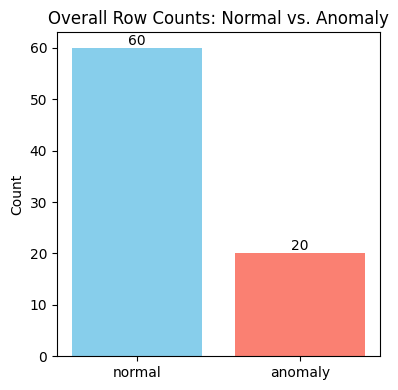

In [4]:
# Cell 4: Overall anomaly counts
counts = df["label_overall"].value_counts().rename_axis("label").reset_index(name="count")
counts["percent"] = (counts["count"] / counts["count"].sum() * 100).round(2)
display(counts)

# Bar chart of anomaly vs. normal
plt.figure(figsize=(4, 4))
plt.bar(counts["label"], counts["count"], color=["skyblue", "salmon"])
plt.title("Overall Row Counts: Normal vs. Anomaly")
plt.ylabel("Count")
for i, v in enumerate(counts["count"]):
    plt.text(i, v + max(counts["count"]) * 0.01, f"{v}", ha="center")
plt.tight_layout()
plt.show()


,feature,count
0,multivariate,11
1,accel_z,9
2,accel_y,2


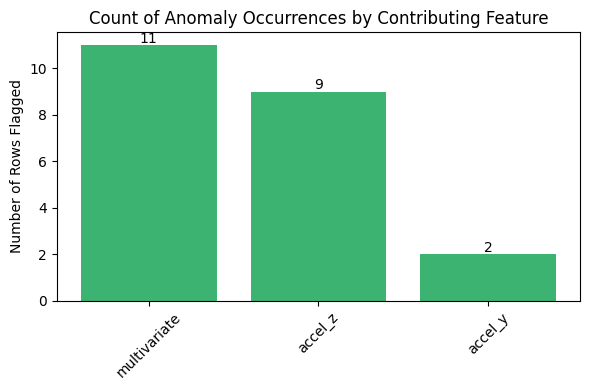

In [5]:
# Cell 5: Count how many times each feature was flagged
# We’ll split 'contributing_features' by comma and count occurrences
all_contrib = df["contributing_features"].str.split(",", expand=True).stack().reset_index(drop=True)
feature_counts = all_contrib.value_counts().rename_axis("feature").reset_index(name="count")
# Remove empty strings if present
feature_counts = feature_counts[feature_counts["feature"] != ""].reset_index(drop=True)

display(feature_counts)

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(feature_counts["feature"], feature_counts["count"], color="mediumseagreen")
plt.title("Count of Anomaly Occurrences by Contributing Feature")
plt.ylabel("Number of Rows Flagged")
plt.xticks(rotation=45)
for idx, val in enumerate(feature_counts["count"]):
    plt.text(idx, val + max(feature_counts["count"]) * 0.01, f"{val}", ha="center")
plt.tight_layout()
plt.show()


In [6]:
# Cell 6: Compute percentage relative to total rows
total_rows = len(df)
feature_counts["percent_of_rows"] = (feature_counts["count"] / total_rows * 100).round(2)
display(feature_counts)


,feature,count,percent_of_rows
0,multivariate,11,13.75
1,accel_z,9,11.25
2,accel_y,2,2.50


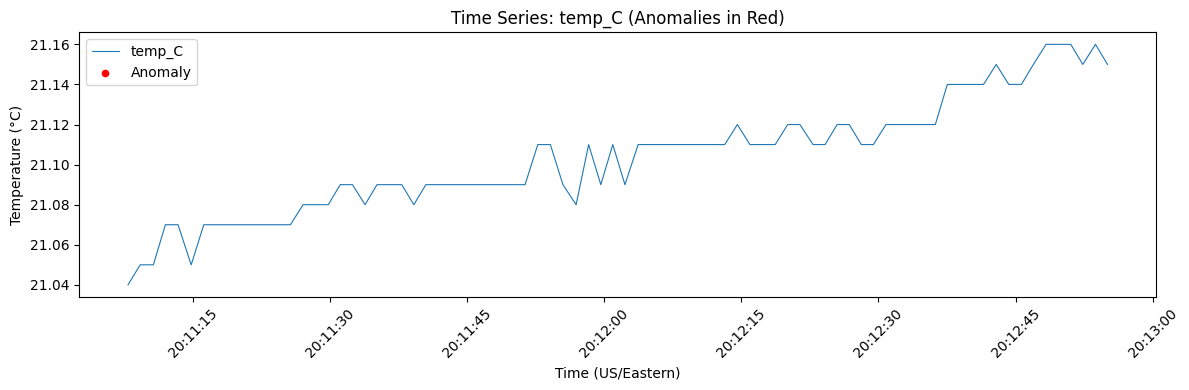

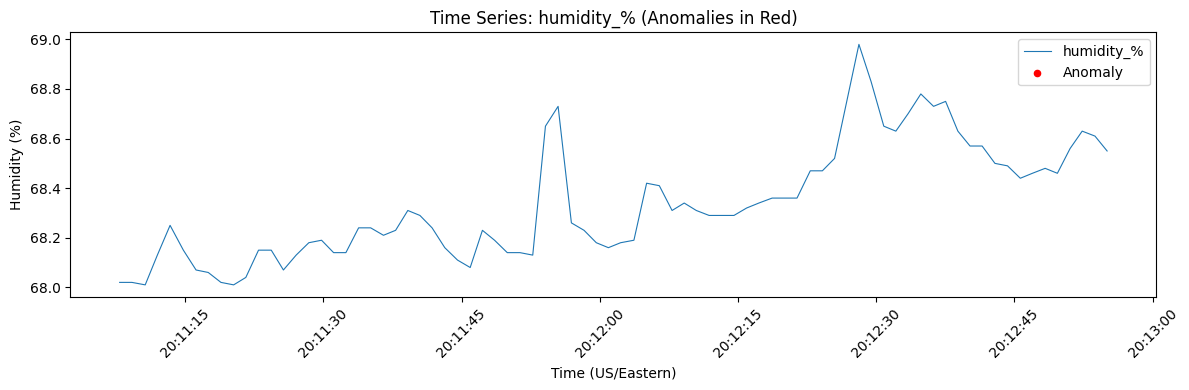

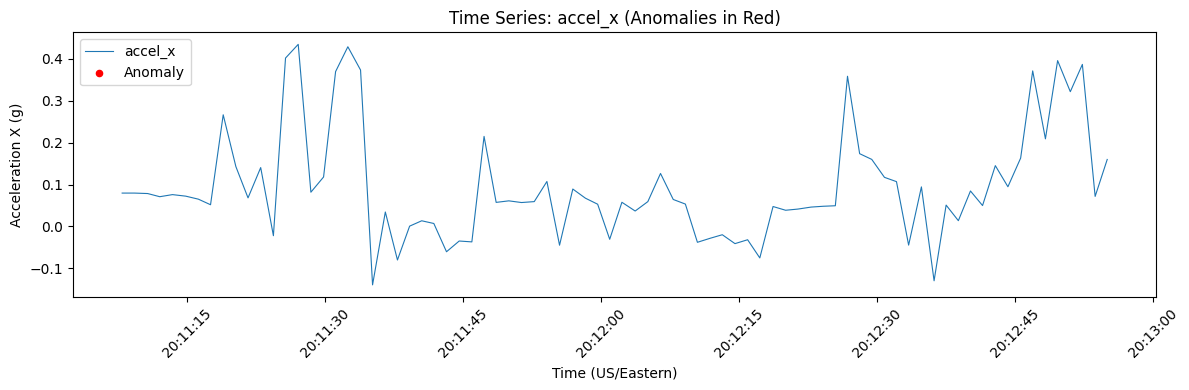

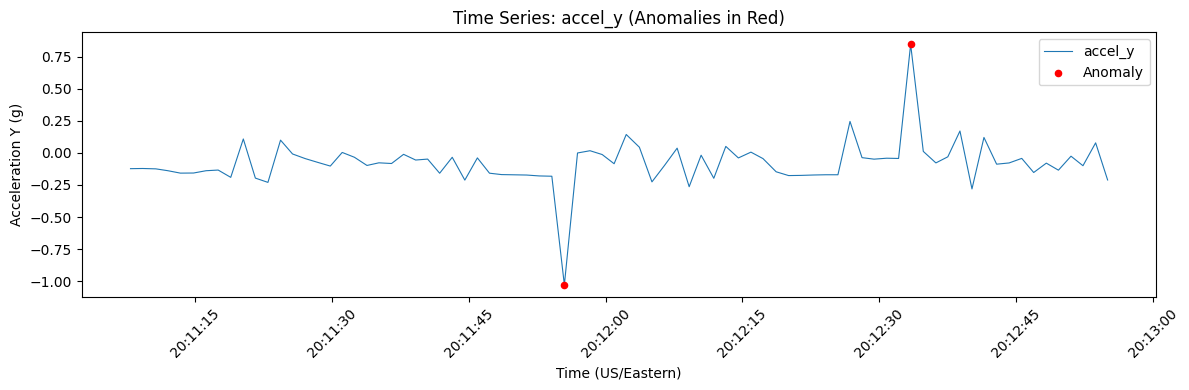

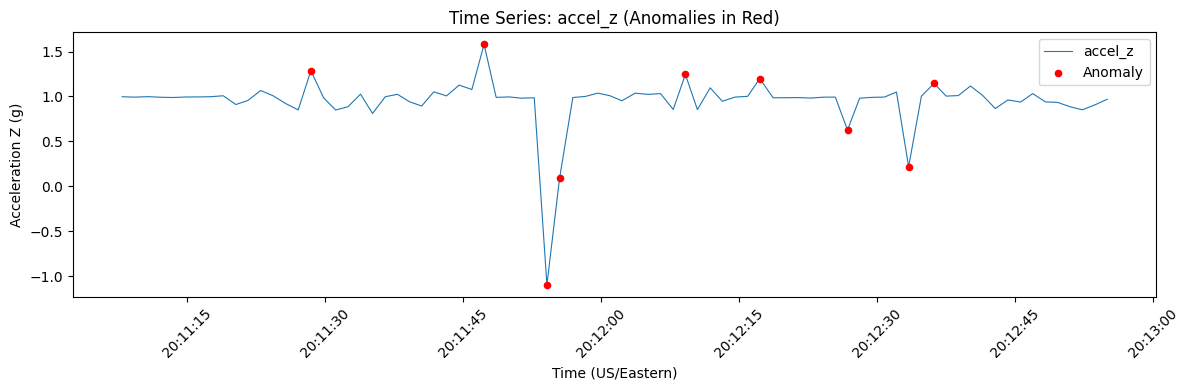

In [7]:
# Cell 7: Function to plot a feature over time and highlight anomalies
def plot_time_series(feature, ylabel):
    plt.figure(figsize=(12, 4))
    plt.plot(df["timestamp"], df[feature], label=feature, linewidth=0.8)
    # Mask rows where overall label is anomaly and that feature is in contributing_features
    mask = (df["label_overall"] == "anomaly") & df["contributing_features"].str.contains(feature)
    plt.scatter(df.loc[mask, "timestamp"], df.loc[mask, feature],
                color="red", s=20, label="Anomaly", zorder=5)
    plt.xlabel("Time (US/Eastern)")
    plt.ylabel(ylabel)
    plt.title(f"Time Series: {feature} (Anomalies in Red)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each feature
plot_time_series("temp_C", "Temperature (°C)")
plot_time_series("humidity_%", "Humidity (%)")
plot_time_series("accel_x", "Acceleration X (g)")
plot_time_series("accel_y", "Acceleration Y (g)")
plot_time_series("accel_z", "Acceleration Z (g)")


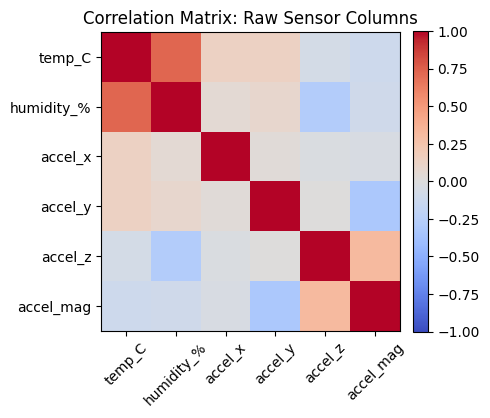

,temp_C,humidity_%,accel_x,accel_y,accel_z,accel_mag
temp_C,1.00,0.72,0.14,0.14,-0.07,-0.11
humidity_%,0.72,1.00,0.05,0.08,-0.28,-0.10
accel_x,0.14,0.05,1.00,0.03,-0.03,-0.04
accel_y,0.14,0.08,0.03,1.00,0.00,-0.32
accel_z,-0.07,-0.28,-0.03,0.00,1.00,0.32
accel_mag,-0.11,-0.10,-0.04,-0.32,0.32,1.00


In [8]:
# Cell 8: Compute correlation on raw sensor features
corr_matrix = df[sensor_cols].corr().round(2)

plt.figure(figsize=(5, 5))
plt.imshow(corr_matrix, vmin=-1, vmax=1, cmap="coolwarm")
plt.colorbar(fraction=0.046, pad=0.04)
plt.xticks(range(len(sensor_cols)), sensor_cols, rotation=45)
plt.yticks(range(len(sensor_cols)), sensor_cols)
plt.title("Correlation Matrix: Raw Sensor Columns")
plt.tight_layout()
plt.show()

display(corr_matrix)


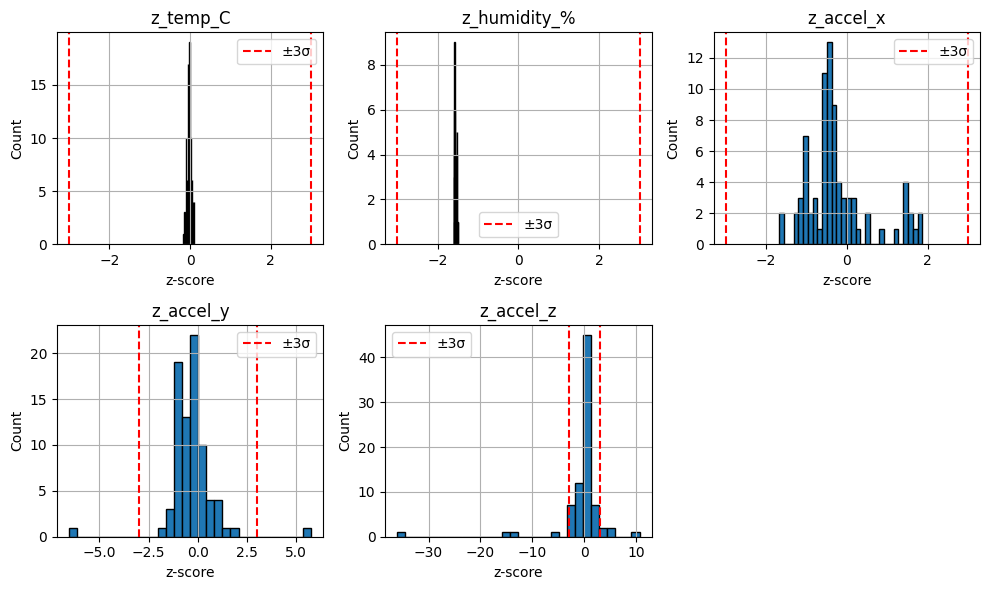

In [9]:
# Cell 9: Histograms of z‐scores for each feature

# Ensure feature_list is defined (if not already)
feature_list = ["temp_C", "humidity_%", "accel_x", "accel_y", "accel_z"]

# Build list of z‐score column names
z_cols = [f"z_{f}" for f in feature_list]

plt.figure(figsize=(10, 6))
for idx, zcol in enumerate(z_cols):
    plt.subplot(2, 3, idx + 1)
    df[zcol].hist(bins=30, edgecolor="black")
    plt.axvline(3, color="red", linestyle="--", label="±3σ")
    plt.axvline(-3, color="red", linestyle="--")
    plt.title(zcol)
    plt.xlabel("z-score")
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()


C:\Users\tyler\AppData\Local\Temp\ipykernel_10808\3815444660.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hourly = df.groupby("hour").apply(


,hour,percent_anomaly
0,20,25.0


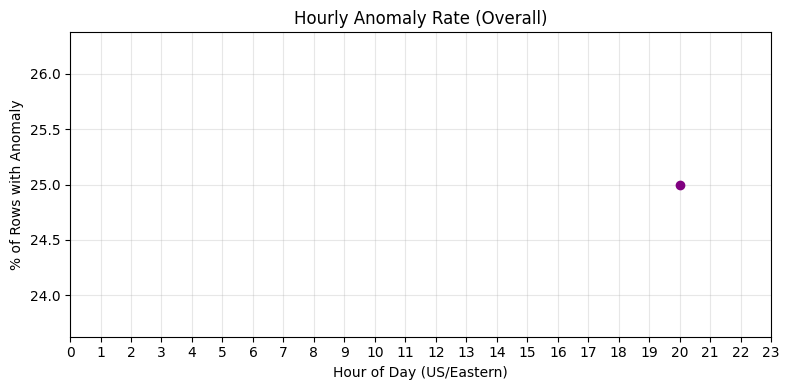

In [10]:
# Cell 10: Extract hour from timestamp
df["hour"] = df["timestamp"].dt.hour

# Count anomalies per hour and compute percentage
hourly = df.groupby("hour").apply(
    lambda sub: (sub["label_overall"] == "anomaly").sum() / len(sub) * 100
).rename("percent_anomaly").reset_index()

display(hourly)

# Plot hourly anomaly rate
plt.figure(figsize=(8, 4))
plt.plot(hourly["hour"], hourly["percent_anomaly"], marker="o", linestyle="-", color="purple")
plt.xlabel("Hour of Day (US/Eastern)")
plt.ylabel("% of Rows with Anomaly")
plt.title("Hourly Anomaly Rate (Overall)")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


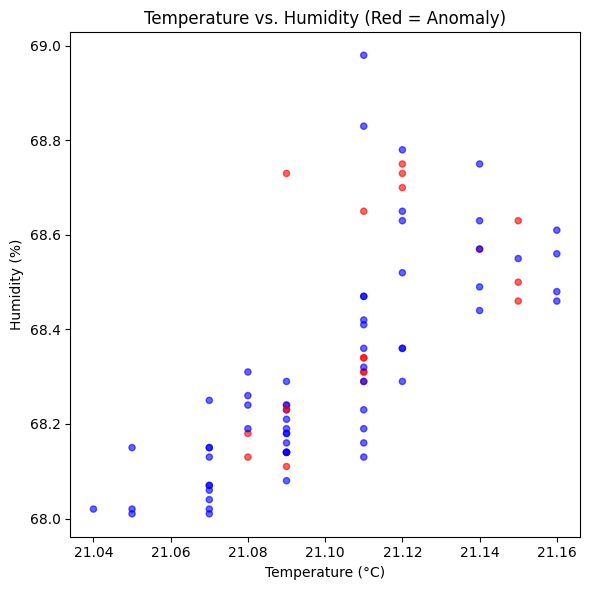

In [11]:
# Cell 11: Scatter of temp_C vs. humidity_%, colored by label_overall
colors = df["label_overall"].map({"normal": "blue", "anomaly": "red"})
plt.figure(figsize=(6, 6))
plt.scatter(df["temp_C"], df["humidity_%"], c=colors, alpha=0.6, s=20)
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Temperature vs. Humidity (Red = Anomaly)")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df["timestamp"], df["accel_x"], label="accel_x", alpha=0.7)
mask = df["label_accel_x"] == "anomaly"
plt.scatter(df.loc[mask, "timestamp"], df.loc[mask, "accel_x"], color="red", label="Anomaly", s=20)
plt.xticks(rotation=45)
plt.legend()
plt.show()



Exported feature and hourly anomaly summaries to:
 • C:\Users\tyler\Desktop\Pet_Health\data\results\feature_anomaly_counts.csv
 • C:\Users\tyler\Desktop\Pet_Health\data\results\hourly_anomaly_percent.csv
